In [1]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt
import os
from astropy import units
from astropy.coordinates import SkyCoord

[ 6.05286577  4.0441149   4.30876009 ...,  4.41995889  4.61745525
  4.46368733]


Text(0, 0.5, 'DEC')

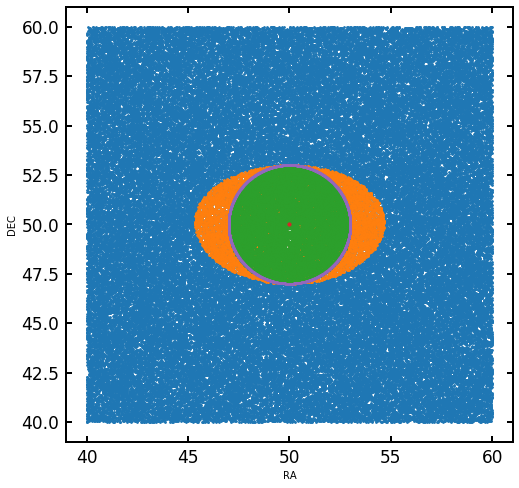

In [30]:
radius = 3
ra_s, ra_e = 40, 60
dec_s, dec_e = 40, 60
cra, cdec = (ra_s+ra_e)/2, (dec_s+dec_e)/2
ra = numpy.random.uniform(ra_s,ra_e,100000)
dec = numpy.random.uniform(dec_s,dec_e,100000)
c1 = SkyCoord(ra=cra*units.degree, dec=cdec*units.degree, frame="icrs")
c2 = SkyCoord(ra=ra*units.degree, dec=dec*units.degree, frame="icrs")
sep = c1.separation(c2).degree
print(sep)
img = Image_Plot(fig_x= 8,fig_y=8)
img.create_subfig(1,1)
img.axs[0][0].scatter(ra,dec,s=3)

idx = sep <= radius
ra_n = (ra[idx] - cra)*numpy.cos(dec[idx]/180*numpy.pi) + cra

img.axs[0][0].scatter(ra[idx],dec[idx],s=3)
img.axs[0][0].scatter(ra_n,dec[idx],s=3)
img.axs[0][0].scatter(cra,cdec,s=10)

theta = numpy.linspace(-numpy.pi, numpy.pi, 5000)
x = cra+numpy.cos(theta)*radius
y = cdec + numpy.sin(theta)*radius
img.axs[0][0].scatter(x,y,s=1)
img.axs[0][0].set_xlabel("RA")
img.axs[0][0].set_ylabel("DEC")

array([ 7.06657439,  7.06516273,  7.06375107, ...,  7.06375107,
        7.06516273,  7.06657439])

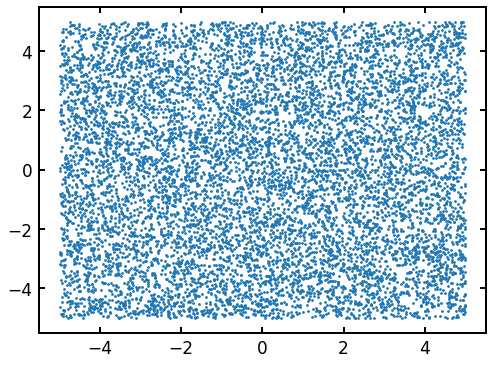